In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
dy2 = "/glade/work/sturbeville/dyamond2/means/"
dy2olr = dy2+"TWP_meanOLR_DY2_models.nc"
dy2swu = dy2+"TWP_meanSWU_DY2_models.nc"
dy2_models=["ICONr0.1deg","SAMr0.1deg","SCREAMr0.1deg","GEOSr0.1deg","NICAM","SHiELDr0.1deg"]
dy_olr = xr.open_dataset(dy2olr)
dy_swu = xr.open_dataset(dy2swu)
dy_olr = dy_olr.drop("UM").drop("IFS").drop("ARPr0.1deg")
dy_swu = dy_swu.drop("UM").drop("ARPr0.1deg")


In [3]:
dyolrmean = dy_olr.to_array().mean()
dyswumean = dy_swu.to_array().mean()
dyolrstd = dy_olr.to_array().std()
dyswustd = dy_swu.to_array().std()
print(dyolrstd, dyswustd)

# for m in dy2_models:
#     plt.scatter(dy_olr[m], dy_swu[m], label=m.split("r")[0])
# plt.scatter(dyolrmean, dyswumean, color='k', s=100)
# plt.plot([dyolrmean]*2, [dyswumean-dyswustd,dyswumean+dyswustd], color='k')
# plt.plot([dyolrmean-dyolrstd,dyolrmean+dyolrstd], [dyswumean]*2, color='k')

# plt.legend()
# plt.grid(True)
# plt.close()

<xarray.DataArray ()>
array(10.39254665) <xarray.DataArray ()>
array(17.7776413)


In [8]:
runs = ["ck","ch","cj", "ci","cg","cf"]
run_names = ["Default","New ice_nuc","1/2x dep","2x dep","1/2x sed","2x sed"]
colors = ["darkred","lightcoral","lightskyblue","mediumblue","lightgreen","darkgreen"]
markers = ["o","o","s","s","D","D"]

nt = 80*24+1
print(nt//24," days ({})".format(nt) )
run_dir = "/glade/scratch/sturbeville/DPSCREAM_simulations/"
qsmall=0
plot_type="OLRvsASR" # OLRvsASR, OLRvsSWU, LWvsSWCRE, IWPvsLWCRE

80  days (1921)


0 Default 247.02423 276.90915
1 New ice_nuc 248.23413 275.3589
2 1/2x dep 246.90474 279.1892
3 2x dep 245.87564 273.62494
4 1/2x sed 245.65092 276.24234
5 2x sed 246.13084 276.4814
save as plots/OLRvsASR_scatter_runs_ck-ch-cj-ci-cg-cf.png


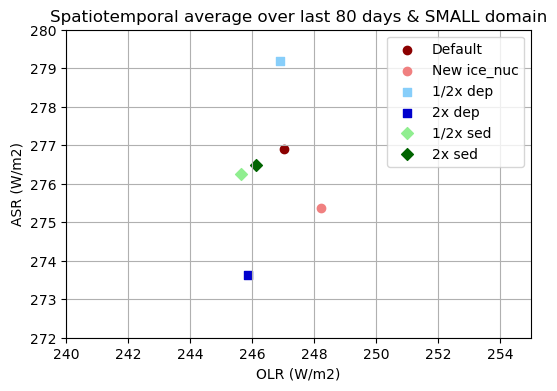

In [9]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
savename="runs_"
do_dyamond=False
for i in range(len(runs)):
    ds = xr.open_dataset(run_dir+"scream_dp_RCE_SMALL_3km_{}/run/scream_dp_RCE_SMALL_3km_{}.eam.h1.2000-01-01-00000.nc".format(runs[i],runs[i]))
    ds = ds.isel(time=slice(-nt, -1))
    var_dict = {}
    savename = savename + runs[i] + "-"
    if plot_type=="OLRvsASR":
        x = ds.FLUT.mean()
        y = (ds.FSNT - ds.FSUTOA).mean()
    elif plot_type=="OLRvsSWU":
        x = ds.FLUT.mean()
        y = ds.FSUTOA.mean()
    elif plot_type=="LWvsSWCRE":
        x = (ds.FLUTC - ds.FLUT).mean() # LWCRE = OLRCS - OLR
        y = -(ds.FSUTOA-ds.FSUTOAC).mean() # SWCRE = - (RSW - RSWCS)
    elif plot_type=="IWPvsLWCRE":
        x = (ds.FLUTC - ds.FLUT).mean() # LWCRE = OLRCS - OLR
        y = (ds.TGCLDIWP.mean())*1000 #g/m2
    elif plot_type=="NIvsLWCRE":
        x = (ds.FLUTC - ds.FLUT).mean() # LWCRE = OLRCS - OLR
        y = ds.NUMICE.mean()
        
    # plot
    print(i,run_names[i],x.values,y.values)
    ax.scatter(x,y, label=run_names[i], c=colors[i], marker=markers[i])
ax.legend(loc="best")
ax.grid(True)
if plot_type=="OLRvsASR":
    ax.set_xlim([240,255])
    ax.set_ylim([272,280])
    ax.set_xlabel("OLR (W/m2)")
    ax.set_ylabel("ASR (W/m2)")
elif plot_type=="OLRvsSWU":
    ax.set_xlim([240,255])
    ax.set_ylim([61,68])
    ax.set_xlabel("OLR (W/m2)")
    ax.set_ylabel("SWU (W/m2)")
elif plot_type=="LWvsSWCRE":
    ax.set_xlim([25,31])
    ax.set_ylim([-38,-33])
    ax.set_xlabel("LW CRE (W/m2)")
    ax.set_ylabel("SW CRE (W/m2)")
elif plot_type=="IWPvsLWCRE":
    ax.set_xlim([25,31])
    ax.set_ylim([70,200])
    # ax.set_ylim([1e-7,1e4])
    # ax.set_yscale("log")
    ax.set_xlabel("LW CRE (W/m2)")
    ax.set_ylabel("IWP (g/m2)")
if do_dyamond:
    print("do")
    plt.scatter(dyolrmean, dyswumean, color='k', s=100)
    plt.plot([dyolrmean]*2, [dyswumean-dyswustd,dyswumean+dyswustd], color='k')
    plt.plot([dyolrmean-dyolrstd,dyolrmean+dyolrstd], [dyswumean]*2, color='k')
ax.set_title("Spatiotemporal average over last {} days & SMALL domain".format(nt//24))
print("save as plots/{}_scatter_{}.png".format(plot_type, savename[:-1]))
plt.savefig("plots/{}_scatter_{}.png".format(plot_type, savename[:-1]))
plt.show()

In [13]:
olrstd = np.std(np.array([247,248.2,246.9,245.87,246.65,246.13]))
swustd = np.std(np.array([64.4, 65.2,63.3,66,64.7,64.66]))
olrstd, swustd

(0.746757806937575, 0.8155775050028464)